In [1]:
# imports here

import hist
import boost_histogram as bh

# 1. Features to add (Project 1)

## Example - 1.1 

In [2]:
# Data generation

import numpy as np

# Random numbers from -1 to 1
x, y = np.random.random_sample([2, 1_000_000])*2 - 1

# Only hits inside radius 1 are "valid"
valid = (x**2 + y**2) < 1

In [3]:
# Pure boost-histogram
import boost_histogram as bh

h = bh.Histogram(
    bh.axis.Regular(10, -1, 1, metadata={'name':'x'}),
    bh.axis.Regular(10, -1, 1, metadata={'name':'y'}),
    bh.axis.Integer(0, 2, underflow=False, overflow=False, metadata={'name':'valid'}),
)

h.fill(x, y, valid)

valid_only = h[:, :, bh.loc(True)] # Passing True directly happens to work here as well
valid_only = h[{2:bh.loc(True)}]   # Alternate way to do the same thing ### BROKEN in 0.6.2

valid_and_invalid = h[:, :, ::bh.sum]                 # All (valid and invalid)
valid_and_invalid = h[{2:slice(None, None, bh.sum)}]   # Alternate way to do the same thing

In [4]:
# Hypothetical Hist

from hist import NamedHist, axis

h = NamedHist(
    axis.Regular(10, -1, 1, name="x"),
    axis.Regular(10, -1, 1, name="y"),
    axis.bool(name="valid"),
)

h.fill(x=x, y=y, valid=valid)

valid_only = h[{"valid": bh.loc(True)}]
valid_and_invalid = h[{"valid": slice(None, None, bh.sum)}]

## Example - 1.2

In [5]:
from numpy.testing import assert_array_equal

# Data generation

import numpy as np

# Random numbers from -1 to 1
x, y = np.random.random_sample([2, 1_000_000])*2 - 1

# Only hits inside radius 1 are "valid"
valid = (x**2 + y**2) < 1

# Hypothetical Hist

from hist import NamedHist, axis

h = NamedHist(
    axis.Regular(10, -1, 1, name="x"),
    axis.Regular(10, -1, 1, name="y"),
    axis.bool(name="valid"),
)

# Passing parameters in any order gives the same h.view()
h.fill(x=x, y=y, valid=valid)
a = h.view()
h.reset()

h.fill(y=y, valid=valid, x=x)
b = h.view()
h.reset()

h.fill(valid=valid, x=x, y=y)
c = h.view()
h.reset()

assert_array_equal(a, b)
assert_array_equal(b, c)
assert_array_equal(c, a)

## Example - 1.3

In [6]:
# Gives error if any axis name is not set in NamedHist

h = NamedHist(
    axis.Regular(10, -1, 1),
    axis.Regular(10, -1, 1, name="y"),
    axis.bool(name="valid"),
)

ValueError: Axis: Regular(10, -1, 1, metadata={'name': None, 'title': None}) name should be a valid Identifier.

# 2. Plots to add (Project 2)

## Example - 2.1

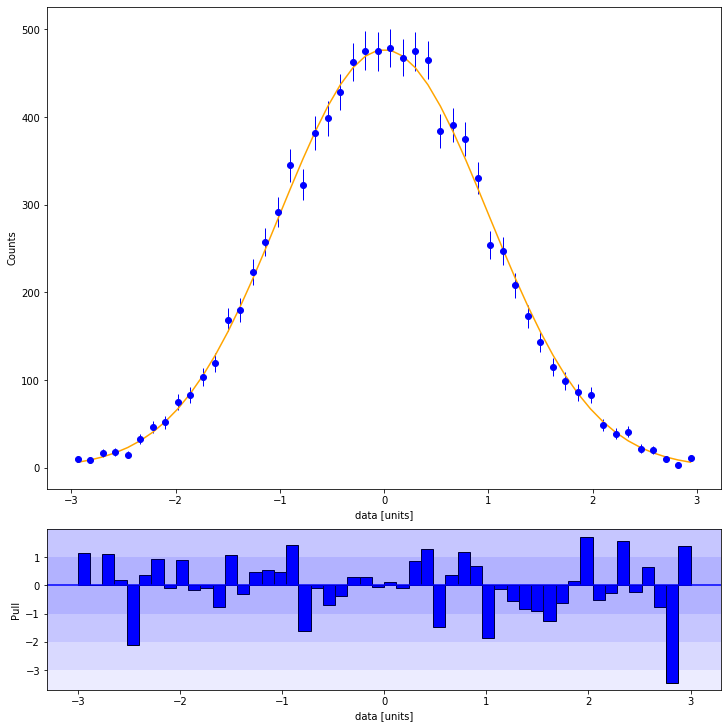

In [7]:
from hist import Hist, axis

data = np.random.normal(size=10_000)
h = Hist(
    axis.Regular(50, -3, 3, title="data [units]"),
)
h.fill(data)

def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-.5*x**2)

ax1, ax2 = h.pull_plot(pdf)

## Example - 2.2

We may want to change the `figure size` or `ratio between the sizes of the two plots`.

The default plot above produces a `3:1` ratio between the subplots.

In the next cell we will create a `1:1` ratio between the subplots.

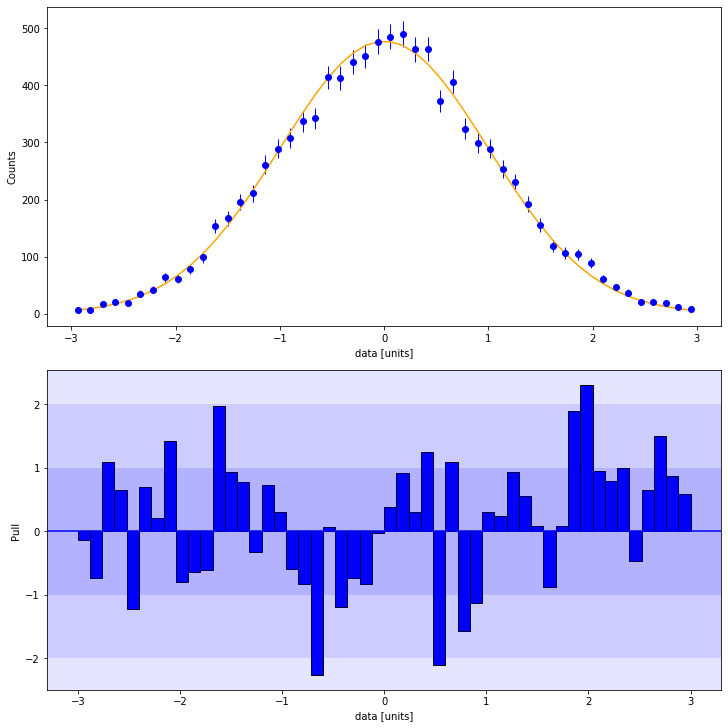

In [8]:
from hist import Hist, axis
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data = np.random.normal(size=10_000)
h = Hist(
    axis.Regular(50, -3, 3, title="data [units]"),
)
h.fill(data)

def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-.5*x**2)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 1, figure=fig)
ax = fig.add_subplot(gs[0:1, 0])
pull_ax = fig.add_subplot(gs[1:, 0])

ax1, ax2 = h.pull_plot(pdf, ax=ax, pull_ax=pull_ax)

## Example - 2.3

Here we will create a `3:2` ratio between the subplots.

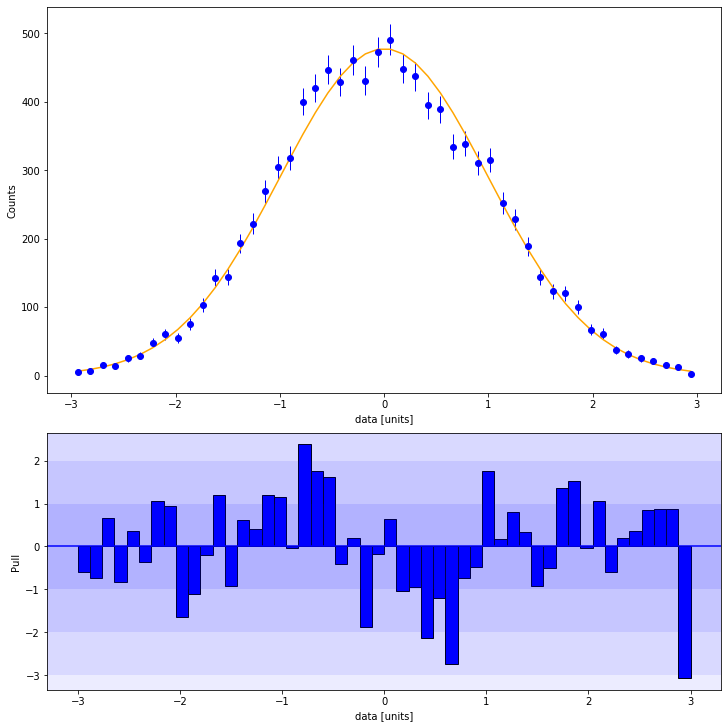

In [9]:
from hist import Hist, axis
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data = np.random.normal(size=10_000)
h = Hist(
    axis.Regular(50, -3, 3, title="data [units]"),
)
h.fill(data)

def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-.5*x**2)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = gridspec.GridSpec(5, 1, figure=fig)
ax = fig.add_subplot(gs[0:3, 0])
pull_ax = fig.add_subplot(gs[3:, 0])

ax1, ax2 = h.pull_plot(pdf, ax=ax, pull_ax=pull_ax)

## Example - 2.4

`title` can be `None` in Hist.

In [10]:
h = Hist(
    axis.Regular(50, -3, 3),
)

# 3. Check performance of `fill()`

## Example - 3.1
`fill()` in `NamedHist`

In [11]:
# docstring of fill() in NamedHist

print(hist.NamedHist.fill.__doc__)


        Fills only allowed by passing values with the corresponding keyword `name`.

        Parameters
        ----------
        **values : dict
            Values passed as assigned keyword arguments.
        weight : List[Union[Array[float], Array[int], Array[str], float, int, str]]]
            Provide weights (only if the histogram storage supports it)
        sample : List[Union[Array[float], Array[int], Array[str], float, int, str]]]
            Provide samples (only if the histogram storage supports it)
        


In [12]:
# checking `weight` parameter of fill() in NamedHist

h = NamedHist(axis.Regular(10, 0, 1,name="x"))
h.fill(x=[.2, .3], weight=[.5, 2])

print(h.view())

assert h[{"x":bh.loc(.2)}]==0.5
assert h[{"x":bh.loc(.3)}]==2.0

[0.  0.  0.5 2.  0.  0.  0.  0.  0.  0. ]


In [13]:
# checking `sample` parameter of fill() in NamedHist

h = NamedHist(axis.Regular(10, 0, 10, name="x"), storage=bh.storage.Mean())
h.fill(x=[0.5]*3, sample=[.3, .4, .5])

NamedHist(Regular(10, 0, 10, metadata={'name': 'x', 'title': None}), storage=Mean()) # Sum: Mean(count=3, value=0.4, variance=0.01)

## Example - 3.2
`fill()` in `Hist`

In [14]:
# docstring of fill() in Hist

print(hist.Hist.fill.__doc__)


        Fills only allowed by either passing values with the corresponding
        keyword `name` or passing positional arguments.

        Parameters
        ----------
        *args : positional arguments. Union[Array[float], Array[int], Array[str], float, int, str]
            Provide one value or array per dimension.
        **values : dict
            Values passed as assigned keyword arguments.
        weight : List[Union[Array[float], Array[int], Array[str], float, int, str]]]
            Provide weights (only if the histogram storage supports it)
        sample : List[Union[Array[float], Array[int], Array[str], float, int, str]]]
            Provide samples (only if the histogram storage supports it)
        


In [15]:
# checking `weight` parameter of fill() in Hist

h = Hist(axis.Regular(10, 0, 1))
h.fill([.2, .3], weight=[.5, 2])

print(h.view())

assert h[bh.loc(.2)]==0.5
assert h[bh.loc(.3)]==2.0

[0.  0.  0.5 2.  0.  0.  0.  0.  0.  0. ]


In [16]:
# checking `sample` parameter of fill() in Hist

h = Hist(axis.Regular(10, 0, 10), storage=bh.storage.Mean())
h.fill([0.5]*3, sample=[.3, .4, .5])

Hist(Regular(10, 0, 10, metadata={'name': None, 'title': None}), storage=Mean()) # Sum: Mean(count=3, value=0.4, variance=0.01)

# 4. Doc Strings

Let us check some `doc strings` of our new package.

In [17]:
# doc string of Regular axis class

print(hist.axis.Regular.__doc__)

# Similarly doc strings for other axis class can be obtained


    Similar to `boost_histogram.axis.Regular` class.
    Supports functionality for adding `name` and `title` to the axis.
    


In [18]:
# doc string of Regular __init__ function

print(hist.axis.Regular.__init__.__doc__)

# Similarly doc strings for other axis __init__ function can be obtained


        Make a regular axis with nice keyword arguments for underflow,
        overflow, and growth.
        Parameters
        ----------
        bins : int
            The number of bins between start and stop
        start : float
            The beginning value for the axis
        stop : float
            The ending value for the axis
        name : str
            The name to be assigned to the axis
        title : str
            The title to be assigned to the axis
        underflow : bool = True
            Enable the underflow bin
        overflow : bool = True
            Enable the overflow bin
        growth : bool = False
            Allow the axis to grow if a value is encountered out of range.
            Be careful, the axis will grow as large as needed.
        circular : bool = False
            Filling wraps around.
        transform : Optional[AxisTransform] = None
            Transform the regular bins (Log, Sqrt, and Pow(v))
        


In [19]:
# doc string of NamedHist class

print(hist.NamedHist.__doc__)


    NamedHist class.
    Requires `name` to be set on any axis. `name` should be a valid identifier.
    Requires keyword fills by name.
    Allows (or requires) __getitem__ access by named dict key instead of axis number.
    


In [20]:
# doc string of Hist class

print(hist.Hist.__doc__)


    Hist plotting class. Currently supports only pull_plot plotting.
    Axes of the Hist class should be filled as done in boost_histogram.
    This class does not support axes filling by name.
    Requires adding `title` as an axis option.
    


In [21]:
# doc string of Hist pull_plot function

print(hist.Hist.pull_plot.__doc__)


        Generates a pull plot of the function passed.

        Parameters
        ----------
        func : function
            Callable function whose corresponding plots are to be generated.
        ax : matplotlib.axes._subplots.AxesSubplot = None
            Matplotlib axis for the upper subplot [Counts vs title].
        pull_ax : matplotlib.axes._subplots.AxesSubplot = None
            Matplotlib axis for the lower subplot [Pull vs title].
        
